<img src="https://github.com/LucaScaldaferri/Curso_Cientista_de_Dados/blob/main/logo_ebac.png?raw=true" alt="ebac-logo">


---

# **Profissão Cientista de Dados**
## **Módulo** 12 | Regressão I | Exercício 3
Resolução Caderno de **Exercícios**<br> 
Aluno [Lucas Scaldaferri Magalhães Freitas](https://www.linkedin.com/in/0scaldaferri-lucas/) <br>

# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

tips = sns.load_dataset("tips")
df = tips.rename(columns={'total_bill': 'total_conta',
                        'tip': 'gorjeta',
                        'sex': 'sexo',
                        'smoker': 'fumante',
                        'day': 'dia',
                        'time': 'periodo',
                        'size': 'tamanho'})

df['gorjeta_pct'] = df['gorjeta'] / (df['total_conta'] - df['gorjeta'])
df['conta'] = df['total_conta'] - df['gorjeta']
df.head()

,total_conta,gorjeta,sexo,fumante,dia,periodo,tamanho,gorjeta_pct,conta
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [32]:
# 1.1

y, X = patsy.dmatrices('gorjeta ~ sexo + fumante + periodo + conta', df)
X

DesignMatrix with shape (244, 5)
  Intercept  sexo[T.Female]  fumante[T.No]  periodo[T.Dinner]  conta
          1               1              1                  1  15.98
          1               0              1                  1   8.68
          1               0              1                  1  17.51
          1               0              1                  1  20.37
          1               1              1                  1  20.98
          1               0              1                  1  20.58
          1               0              1                  1   6.77
          1               0              1                  1  23.76
          1               0              1                  1  13.08
          1               0              1                  1  11.55
          1               0              1                  1   8.56
          1               1              1                  1  30.26
          1               0              1                  1  13.85
 

In [33]:
# 1.2

y, X = patsy.dmatrices('gorjeta ~ sexo + fumante + periodo + conta', df)

modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                gorjeta   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           2.64e-20
Time:                        18:05:08   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.1999      0.242      4.952      0.000       0.723       1.677
sexo[T.Female]       -0.0034      0.156     -0.022      0.982      -0.311       0.305
fumante[T.No]         0.1405      0.151      0.932      0.352      -0.156       0.437
periodo[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
conta                 0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3]:
# y, X = patsy.dmatrices('gorjeta ~ sexo + fumante + periodo + conta', df)

y, X = patsy.dmatrices('gorjeta ~ conta', df)

modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                gorjeta   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           5.02e-23
Time:                        14:43:15   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
conta          0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

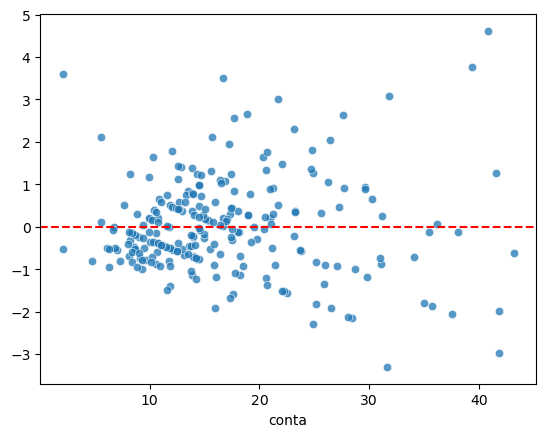

In [4]:
# 1.3

sns.scatterplot(x = 'conta', y = modelo.resid, data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [5]:
# 1.4

y, X = patsy.dmatrices('gorjeta ~ np.log(conta)', df)

modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                gorjeta   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           4.40e-20
Time:                        14:43:16   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.2575      0.430     -2.924      0.004      -2.104      -0.410
np.log(conta)     1.5695      0.156     10.049      0.000       1.262       1.877
==============================================================================
Omnibus:                       73.945   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.148
Skew:                           1.303   Prob(JB):                     9.51e-49
Kurtosis:                       6.868   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
y, X = patsy.dmatrices('gorjeta ~ conta + np.power(conta, 2)', df)

modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                gorjeta   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.55
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           4.96e-22
Time:                        14:43:29   Log-Likelihood:                -375.28
No. Observations:                 244   AIC:                             756.6
Df Residuals:                     241   BIC:                             767.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.0743      0.353      3.039      0.003       0.378       1.770
conta                  0.1288      0.037      3.493      0.001       0.056       0.202
np.power(conta, 2)    -0.0007      0.001     -0.825      0.410      -0.002       0.001
==============================================================================
Omnibus:                       39.745   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.849
Skew:                           0.830   Prob(JB):                     1.25e-17
Kurtosis:                       5.214   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

O melhor modelou se apresentou ao transformar ```net_bill (conta)``` em um polinômio.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [25]:
# 2.1

y, X = patsy.dmatrices('np.log(gorjeta) ~ sexo + fumante + periodo + conta', df)
X

DesignMatrix with shape (244, 5)
  Intercept  sexo[T.Female]  fumante[T.No]  periodo[T.Dinner]  conta
          1               1              1                  1  15.98
          1               0              1                  1   8.68
          1               0              1                  1  17.51
          1               0              1                  1  20.37
          1               1              1                  1  20.98
          1               0              1                  1  20.58
          1               0              1                  1   6.77
          1               0              1                  1  23.76
          1               0              1                  1  13.08
          1               0              1                  1  11.55
          1               0              1                  1   8.56
          1               1              1                  1  30.26
          1               0              1                  1  13.85
 

In [38]:
# 2.2

y, X = patsy.dmatrices('gorjeta ~ sexo + fumante + periodo + conta', df)

modelo2 = sm.OLS(y,X).fit()
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                gorjeta   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           2.64e-20
Time:                        18:05:38   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.1999      0.242      4.952      0.000       0.723       1.677
sexo[T.Female]       -0.0034      0.156     -0.022      0.982      -0.311       0.305
fumante[T.No]         0.1405      0.151      0.932      0.352      -0.156       0.437
periodo[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
conta                 0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# y, X = patsy.dmatrices('gorjeta ~ sexo + fumante + periodo + conta', df)

y, X = patsy.dmatrices('gorjeta ~ conta', df)

modelo2 = sm.OLS(y,X).fit()
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                gorjeta   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           5.02e-23
Time:                        14:43:51   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
conta          0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

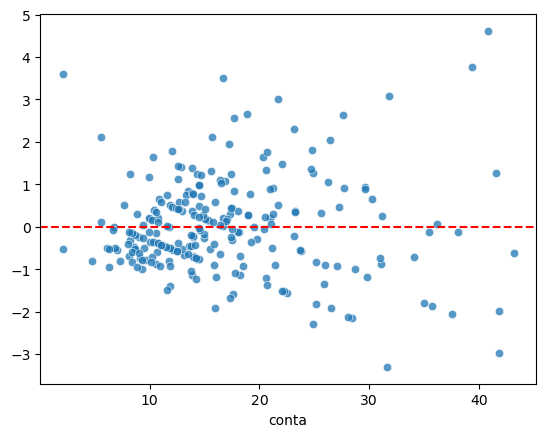

In [9]:
# 2.3

sns.scatterplot(x = 'conta', y = modelo2.resid, data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [10]:
# 2.4

y, X = patsy.dmatrices('gorjeta ~ np.log(conta)', df)

modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                gorjeta   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           4.40e-20
Time:                        14:44:24   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.2575      0.430     -2.924      0.004      -2.104      -0.410
np.log(conta)     1.5695      0.156     10.049      0.000       1.262       1.877
==============================================================================
Omnibus:                       73.945   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.148
Skew:                           1.303   Prob(JB):                     9.51e-49
Kurtosis:                       6.868   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
y, X = patsy.dmatrices('gorjeta ~ conta + np.power(conta, 2)', df)

modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                gorjeta   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.55
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           4.96e-22
Time:                        14:44:33   Log-Likelihood:                -375.28
No. Observations:                 244   AIC:                             756.6
Df Residuals:                     241   BIC:                             767.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.0743      0.353      3.039      0.003       0.378       1.770
conta                  0.1288      0.037      3.493      0.001       0.056       0.202
np.power(conta, 2)    -0.0007      0.001     -0.825      0.410      -0.002       0.001
==============================================================================
Omnibus:                       39.745   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.849
Skew:                           0.830   Prob(JB):                     1.25e-17
Kurtosis:                       5.214   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Novamente, o melhor modelou se apresentou ao transformar net_bill (conta) em um polinômio.

2.5

O cálculo de R² da variável ```tip (gorjeta)``` foi calculado no início do exercício e apresentou R² de 33,5%, enquanto a variável ```tip_log (gorjeta_log)``` apresentou R² de 29,5%. <br>
Desta forma ```tip (gorjeta)``` foi o melhor modelo.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [15]:
filepath = 'https://raw.githubusercontent.com/LucaScaldaferri/Curso_Cientista_de_Dados/main/M%C3%B3dulo%2010%20-%20Descritiva%20II%20-%20An%C3%A1lise%20descritiva%20para%20resposta%20cont%C3%ADnua/Exerc%C3%ADcio%203/previsao_de_renda.csv'

previsao_renda = pd.read_csv(filepath, index_col=0)
previsao_renda

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [16]:
previsao_renda.count().isna()

data_ref                 False
index                    False
sexo                     False
posse_de_veiculo         False
posse_de_imovel          False
qtd_filhos               False
tipo_renda               False
educacao                 False
estado_civil             False
tipo_residencia          False
idade                    False
tempo_emprego            False
qt_pessoas_residencia    False
mau                      False
renda                    False
dtype: bool

In [17]:
previsao_renda.drop_duplicates(inplace = True)

In [18]:
previsao_renda.reset_index(inplace = True)
previsao_renda.tail()

,level_0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
14542,14994,2016-03-01,16065,M,True,True,0,Assalariado,Secundário,Casado,Casa,30,9.800000,2.0,False,3018.59
14543,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14544,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14545,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39
14546,14999,2016-03-01,12895,F,True,True,0,Assalariado,Secundário,Casado,Casa,50,3.049315,2.0,False,993.86


In [19]:
# 3.1

reg = smf.ols('renda ~ tempo_emprego', previsao_renda).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     2233.
Date:                Thu, 13 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:49:53   Log-Likelihood:            -1.1883e+05
No. Observations:               12087   AIC:                         2.377e+05
Df Residuals:                   12085   BIC:                         2.377e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2641.5320     62.210     42.462      0.000    2519.591    2763.473
tempo_emprego   285.3146      6.038     47.255      0.000     273.480     297.150
==============================================================================
Omnibus:                     9688.081   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           377776.650
Skew:                           3.569   Prob(JB):                         0.00
Kurtosis:                      29.442   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
previsao_renda['renda_predict'] = reg.predict(previsao_renda)
previsao_renda.head()

,level_0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda,renda_predict
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24,3661.629308
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14,2886.980690
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98,4942.809011
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69,2986.254529
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37,6599.978607


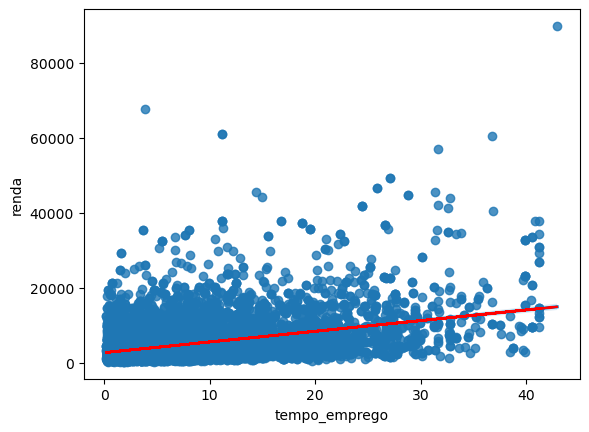

In [21]:
sns.regplot(x='tempo_emprego', y='renda', data = previsao_renda)
plt.plot(previsao_renda['tempo_emprego'], previsao_renda['renda_predict'], 'r')

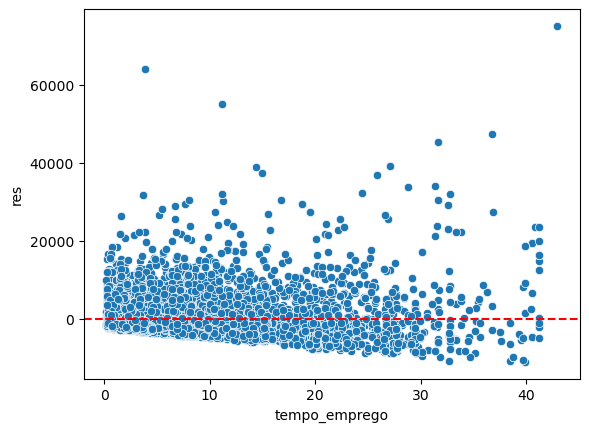

In [22]:
# 3.2

previsao_renda['res'] = reg.resid

sns.scatterplot(x='tempo_emprego', y='res', data = previsao_renda)
plt.axhline(y=0, color='r', linestyle='--')

In [23]:
reg = smf.ols('np.log(renda) ~ np.log(tempo_emprego)', data = previsao_renda).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     1351.
Date:                Thu, 13 Apr 2023   Prob (F-statistic):          2.23e-280
Time:                        14:50:01   Log-Likelihood:                -13855.
No. Observations:               12087   AIC:                         2.771e+04
Df Residuals:                   12085   BIC:                         2.773e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 7.7488      0.013    594.352      0.000       7.723       7.774
np.log(tempo_emprego)     0.2489      0.007     36.750      0.000       0.236       0.262
==============================================================================
Omnibus:                        9.751   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.739
Skew:                           0.065   Prob(JB):                      0.00768
Kurtosis:                       3.048   Cond. No.                         4.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
reg = smf.ols('renda ~ np.log(tempo_emprego)', data = previsao_renda).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     1089.
Date:                Thu, 13 Apr 2023   Prob (F-statistic):          8.41e-229
Time:                        14:50:05   Log-Likelihood:            -1.1933e+05
No. Observations:               12087   AIC:                         2.387e+05
Df Residuals:                   12085   BIC:                         2.387e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2608.5748     80.339     32.470      0.000    2451.098    2766.051
np.log(tempo_emprego)  1377.3324     41.732     33.004      0.000    1295.532    1459.133
==============================================================================
Omnibus:                    10119.008   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           427383.489
Skew:                           3.795   Prob(JB):                         0.00
Kurtosis:                      31.125   Cond. No.                         4.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
reg = smf.ols('np.log(renda) ~ tempo_emprego', data = previsao_renda).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     2040.
Date:                Thu, 13 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:50:09   Log-Likelihood:                -13553.
No. Observations:               12087   AIC:                         2.711e+04
Df Residuals:                   12085   BIC:                         2.712e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.8056      0.010    760.456      0.000       7.785       7.826
tempo_emprego     0.0450      0.001     45.167      0.000       0.043       0.047
==============================================================================
Omnibus:                        3.264   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.195   Jarque-Bera (JB):                3.232
Skew:                           0.035   Prob(JB):                        0.199
Kurtosis:                       3.039   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
reg = smf.ols('renda ~ tempo_emprego + np.power(tempo_emprego, 2)', data = previsao_renda).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     1230.
Date:                Thu, 13 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:50:10   Log-Likelihood:            -1.1873e+05
No. Observations:               12087   AIC:                         2.375e+05
Df Residuals:                   12084   BIC:                         2.375e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   3419.0700     83.383     41.004      0.000    3255.625    3582.515
tempo_emprego                 82.2064     15.823      5.195      0.000      51.191     113.221
np.power(tempo_emprego, 2)     7.5188      0.542     13.869      0.000       6.456       8.581
==============================================================================
Omnibus:                     9431.189   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           335410.689
Skew:                           3.455   Prob(JB):                         0.00
Kurtosis:                      27.864   Cond. No.                         467.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
previsao_renda['res'] = reg.resid

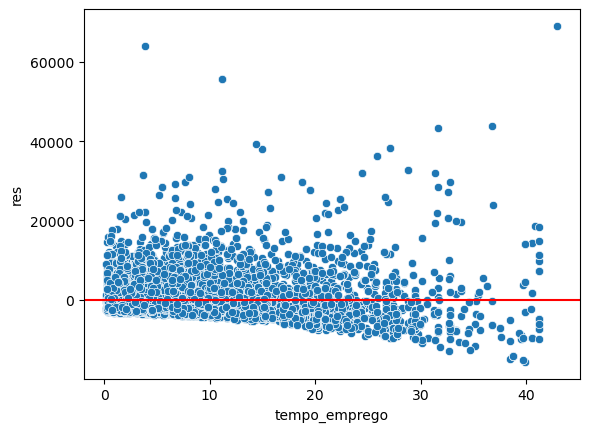

In [28]:
sns.scatterplot(x='tempo_emprego', y='res', data = previsao_renda)
plt.axhline(y=0, color='r')

In [29]:
# 3.3

reg2 = smf.ols('''renda ~ sexo 
                    + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao 
                    + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia''', 
                    data = previsao_renda).fit()

reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     143.4
Date:                Thu, 13 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:50:22   Log-Likelihood:            -1.1833e+05
No. Observations:               12087   AIC:                         2.367e+05
Df Residuals:                   12062   BIC:                         2.369e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         -256.0425   1685.314     -0.152      0.879   -3559.530    3047.445
sexo[T.M]                         2398.1078     89.826     26.697      0.000    2222.035    2574.181
posse_de_veiculo[T.True]          -109.3060     86.390     -1.265      0.206    -278.645      60.033
posse_de_imovel[T.True]            351.5410     85.123      4.130      0.000     184.685     518.397
tipo_renda[T.Bolsista]           -1674.0012   2499.302     -0.670      0.503   -6573.035    3225.033
tipo_renda[T.Empresário]          1049.9069     92.060     11.405      0.000     869.454    1230.360
tipo_renda[T.Pensionista]         1729.7939   1443.838      1.198      0.231   -1100.361    4559.949
tipo_renda[T.Servidor público]     427.8619    133.048      3.216      0.001     167.067     688.657
educacao[T.Pós graduação]         2233.0047   1113.621      2.005      0.045      50.129    4415.880
educacao[T.Secundário]            -301.9373    446.609     -0.676      0.499   -1177.363     573.488
educacao[T.Superior completo]      280.8804    448.464      0.626      0.531    -598.182    1159.943
educacao[T.Superior incompleto]   -342.6552    480.099     -0.714      0.475   -1283.727     598.417
estado_civil[T.Separado]           158.6616    810.474      0.196      0.845   -1429.997    1747.320
estado_civil[T.Solteiro]           387.7277    795.231      0.488      0.626   -1171.053    1946.509
estado_civil[T.União]              -73.6745    146.408     -0.503      0.615    -360.658     213.309
estado_civil[T.Viúvo]              -26.6644    833.469     -0.032      0.974   -1660.398    1607.069
tipo_residencia[T.Casa]           -376.0540    333.908     -1.126      0.260   -1030.567     278.459
tipo_residencia[T.Com os pais]    -615.9501    374.538     -1.645      0.100   -1350.106     118.205
tipo_residencia[T.Comunitário]    -600.6527    646.666     -0.929      0.353   -1868.221     666.916
tipo_residencia[T.Estúdio]       -1030.9275    557.722     -1.848      0.065   -2124.153      62.298
tipo_residencia[T.Governamental]  -900.4822    403.982     -2.229      0.026   -1692.353    -108.612
qtd_filhos                        -233.7394    793.114     -0.295      0.768   -1788.370    1320.891
idade                               31.1840      4.911      6.350      0.000      21.558      40.810
tempo_emprego                      301.3485      6.263     48.119      0.000     289.073     313.624
qt_pessoas_residencia              299.5535    791.513      0.378      0.705   -1251.939    1851.046
==============================================================================
Omnibus:                     9779.803   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           420497.037
Skew:             

In [30]:
# 3.4

reg2 = smf.ols('''renda ~ sexo 
                    + posse_de_imovel
                    + idade 
                    + tempo_emprego''', 
                    data = previsao_renda).fit()

reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     793.3
Date:                Thu, 13 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:50:33   Log-Likelihood:            -1.1844e+05
No. Observations:               12087   AIC:                         2.369e+05
Df Residuals:                   12082   BIC:                         2.369e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 392.9332    189.842      2.070      0.038      20.812     765.054
sexo[T.M]                2318.5760     84.021     27.595      0.000    2153.881    2483.271
posse_de_imovel[T.True]   431.9374     83.598      5.167      0.000     268.072     595.803
idade                      25.4951      4.516      5.645      0.000      16.643      34.347
tempo_emprego             297.7844      6.217     47.901      0.000     285.599     309.970
==============================================================================
Omnibus:                     9847.930   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           427958.615
Skew:                           3.620   Prob(JB):                         0.00
Kurtosis:                      31.237   Cond. No.                         207.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

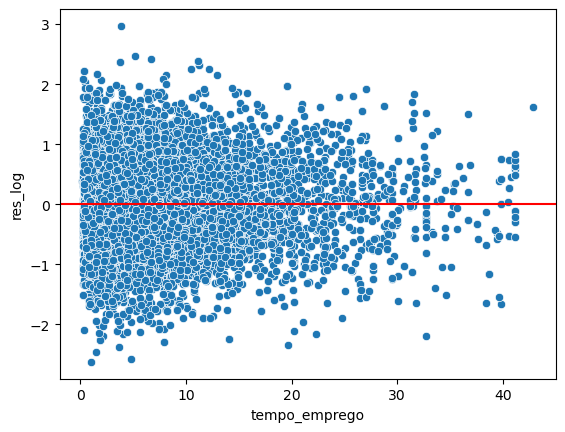

In [33]:
# 3.5

previsao_renda['res_log'] = reg2.resid

sns.scatterplot(x='tempo_emprego', y='res_log', data = previsao_renda)
plt.axhline(y=0, color='r',)

<Axes: xlabel='sexo', ylabel='res_log'>

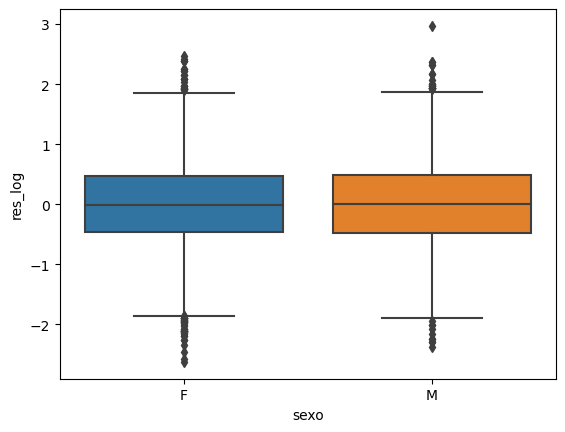

In [235]:
sns.boxplot(x = 'sexo', y = 'res_log', data = previsao_renda)

<Axes: xlabel='posse_de_imovel', ylabel='res_log'>

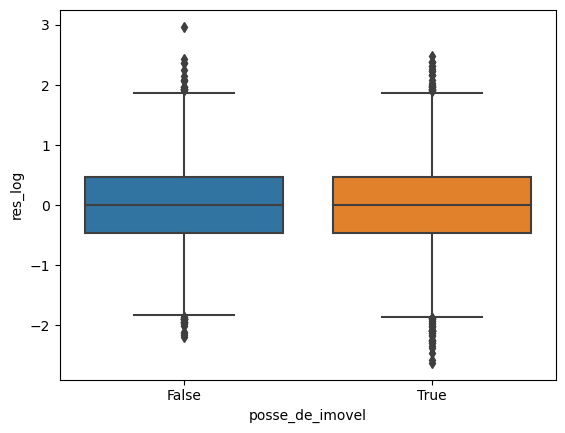

In [236]:
sns.boxplot(x = 'posse_de_imovel', y = 'res_log', data = previsao_renda)

<Axes: xlabel='idade', ylabel='res_log'>

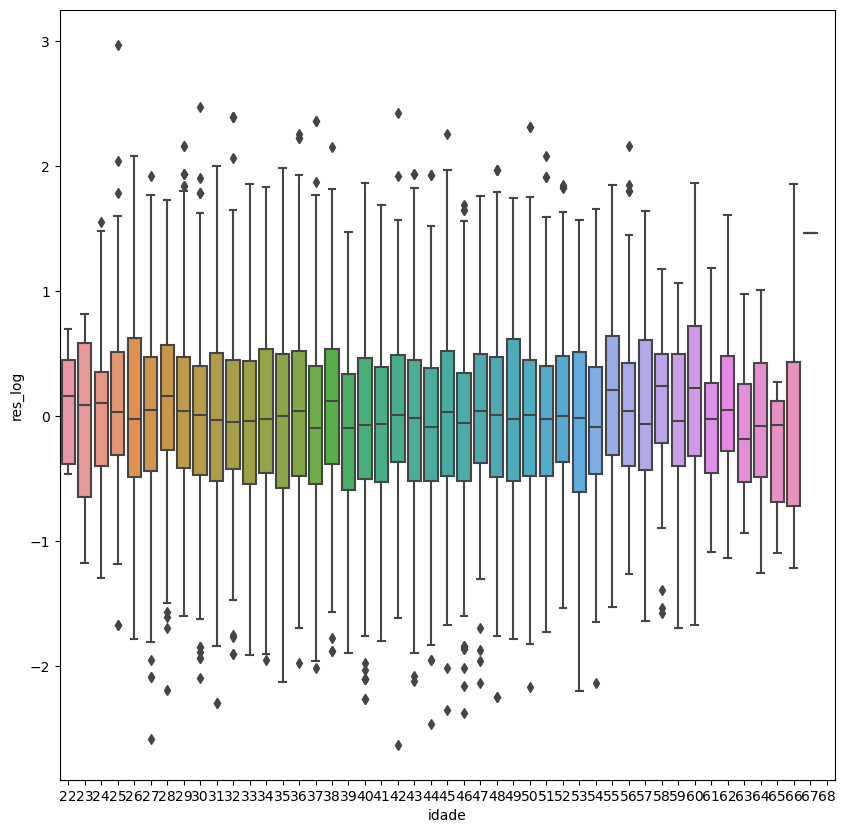

In [244]:
plt.figure(figsize=(10, 10))
sns.boxplot(x = 'idade', y = 'res_log', data = previsao_renda)

Analisando os gráficos plotados (boxplot) é possível identificar que as variáveis explicativas não demonstraram preocupação ao modelo, uma vez que ficaram próximas de 0 (zero) em relação ao resíduo.